In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [ ]:
# Do not change this cell

def calc_hist(image):
    '''
    calculate image histogram
    You completed this method in previous assignment
    input(s):
    image (ndarray): input image
    output(s):
    hist (ndarray): computed input image histogram
    '''
    hist = np.zeros(256,dtype=int)

    for i in range(256):
        hist[i] = np.sum(image == i)
    return hist

## Q1

In [ ]:
def hist_matching(src_image,ref_image):
  '''
  don't use libraries
  You can use calc_hist method
  input(s):
    src_image (ndarray): source image
    ref_image (ndarray): reference image
  output(s):
    output_image (ndarray): transformation of source image so that its histogram matches histogram of refrence image 
  '''
  output_image = src_image.copy()
  ############
  # Your code
  for i in range(src_image.shape[2]):
    ref_hist = calc_hist(ref_image[:,:,i])
    cum_ref=np.cumsum(ref_hist)
    cdf_ref=cum_ref/cum_ref[-1]

    src_hist = calc_hist(src_image[:,:,i])
    cum_src=np.cumsum(src_hist)
    cdf_src=cum_src/cum_src[-1]


    for row in range(src_image.shape[0]):
      for col in range(src_image.shape[1]):
        output_image[row,col,i]=np.argmin(np.abs(cdf_ref-cdf_src[src_image[row,col,i]]))
  # Start
  
  # End
  return output_image

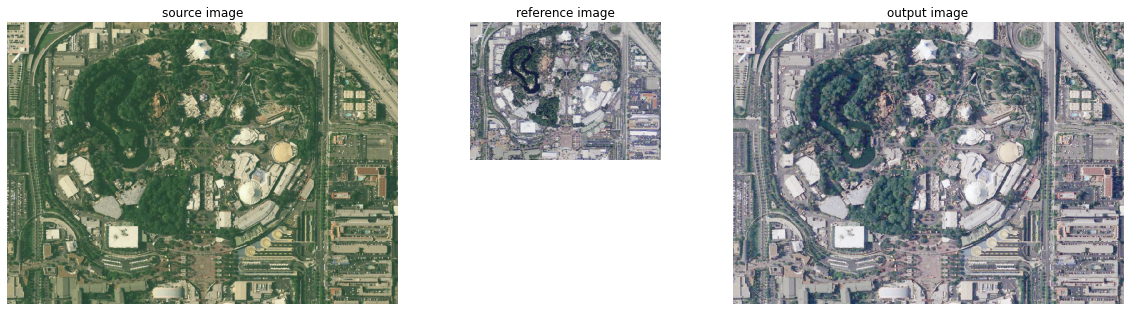

In [ ]:
# Do not change this cell
src = cv2.imread('hist_match_src.jpg')
ref = cv2.imread('hist_match_ref.jpg')
fig = plt.figure(figsize=(20,20))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, 3), 
                 axes_pad=1,  
                 )

grid[0].imshow(src[:,:,::-1])
grid[0].set_title('source image')
grid[0].axis('off')
grid[1].imshow(ref[:,:,::-1])
grid[1].set_title('reference image')
grid[1].axis('off')
grid[2].imshow(hist_matching(src,ref)[:,:,::-1])
grid[2].set_title('output image')
grid[2].axis('off')
plt.show()

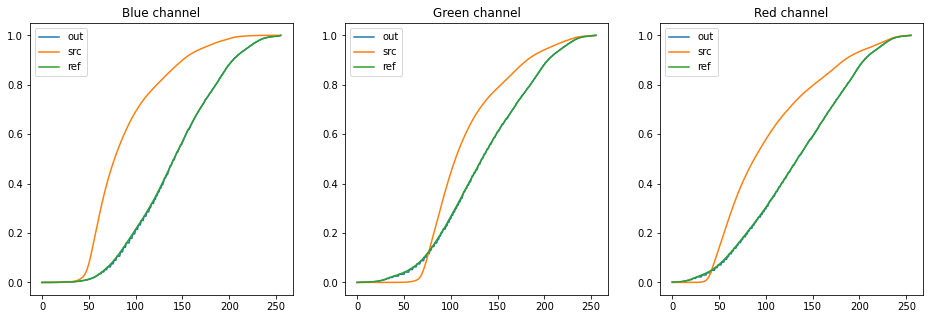

In [ ]:
# Plotting CDF diagram for each channel
# Do not change this cell
fig = plt.figure(figsize= (16, 5))
channels = [(0, 'Blue channel'), (1, 'Green channel'), (2, 'Red channel')]
output = hist_matching(src,ref)
for channel, title in channels:
    fig.add_subplot(1, 3, channel+ 1)
    a = calc_hist(output[:,:,channel])
    a = np.cumsum(a)
    a = a / a[-1]
    b = calc_hist(src[:,:,channel])
    b = np.cumsum(b)
    b = b / b[-1]
    c = calc_hist(ref[:,:,channel])
    c = np.cumsum(c)
    c = c / c[-1]
    plt.plot(a,label='out')
    plt.plot(b,label='src')
    plt.plot(c,label='ref')
    plt.legend()
    plt.title(title)

## Q2
### part b

In [ ]:
def equalize_hist(image):
    '''
    You can use libraries.
    input(s):
    image (ndarray): input image
    output(s):
    output_image (ndarray): enhanced image with histogram equalization
    '''
    output_image = image.copy()
    ############
    # Your code
    # Start
    cv2.equalizeHist(image,output_image)
    # End
    return output_image

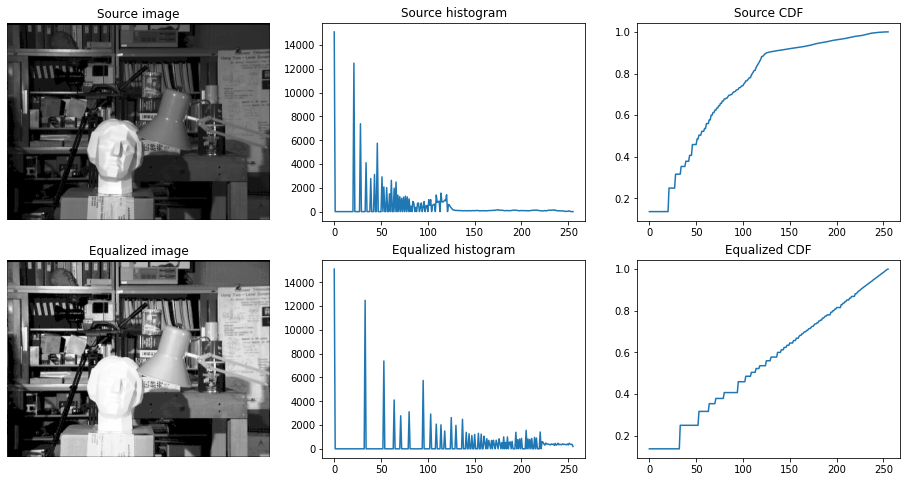

In [ ]:
# Do not change this cell
fig = plt.figure(figsize= (16, 8))
src = cv2.imread('img_improvment.png', cv2.IMREAD_GRAYSCALE)
fig.add_subplot(2,3,1)
plt.imshow(src, cmap='gray')
plt.title('Source image')
plt.axis('off')

fig.add_subplot(2,3,2)
plt.plot(calc_hist(src))
plt.title('Source histogram')

src_cum_hist = np.cumsum(calc_hist(src))
src_cdf = src_cum_hist / src_cum_hist[-1]
fig.add_subplot(2,3,3)
plt.plot(src_cdf)
plt.title('Source CDF')

equalized_img = equalize_hist(src)
fig.add_subplot(2,3,4)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized image')
plt.axis('off')

fig.add_subplot(2,3,5)
plt.plot(calc_hist(equalized_img))
plt.title('Equalized histogram')

eq_cum_hist = np.cumsum(calc_hist(equalized_img))
eq_cdf = eq_cum_hist / eq_cum_hist[-1]
fig.add_subplot(2,3,6)
plt.plot(eq_cdf)
plt.title('Equalized CDF')

plt.show()

## Q3
### part a

In [ ]:
def ACE(image, gridSize):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
    image (ndarray): input image
    gridSize (tuple): window size for calculating histogram equalization
    output(s):
    output (ndarray): improved image
    '''
    output = image.copy()
    #your code here
    # Start 
    borderSize_h = gridSize[0] // 2;
    borderSize_v = gridSize[1] // 2;
    borderType = cv2.BORDER_REPLICATE;
    image2 = cv2.copyMakeBorder(image,borderSize_v,borderSize_v,borderSize_h,borderSize_h,borderType)
    for i in range(borderSize_h,image2.shape[0]-borderSize_h):
      for j in range(borderSize_v,image2.shape[1]-borderSize_v):
       point=equalize_hist(image2[i-10:i+10, j-10:j+10])
       output[i-borderSize_h,j-borderSize_v]=point[borderSize_h,borderSize_v]
    # End

    return output

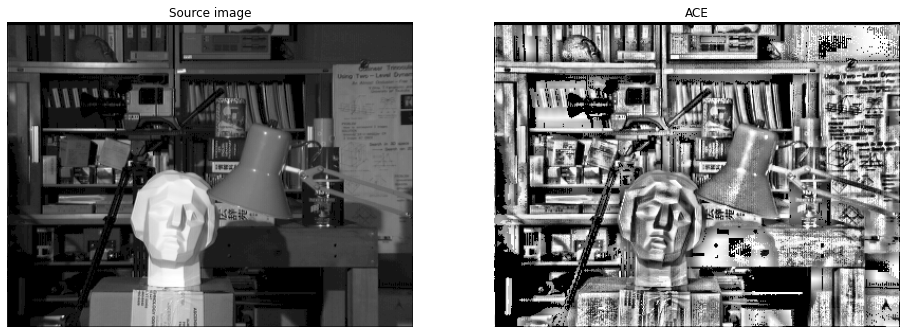

In [ ]:
# Note that you are not supposed to get an excellent result with the default grid size
# The correctness of your implementation is important. it is optional to change the grid size. 
fig = plt.figure(figsize= (16, 8))
src = cv2.imread('img_improvment.png', cv2.IMREAD_GRAYSCALE)
fig.add_subplot(1,2,1)
plt.imshow(src, cmap='gray')
plt.title('Source image')
plt.axis('off')

ace_img = ACE(src,(20,20))      # You get better result with with higher grid size
fig.add_subplot(1,2,2)
plt.imshow(ace_img, cmap='gray')
plt.title('ACE')
plt.axis('off')

plt.show()

### part b

In [10]:
def CLAHE(image, gridSize, clip_limit):
    '''
    you can just use the equalize function of OpenCV for each grid
    You can use OpenCV built-in tools for applying padding
    Use second method for ACE implementation (calculating transition function for each pixel)
    input(s):
    image (ndarray): input image
    gridSize (tuple): window size for calculating histogram equalization
    clip_limit (int): threshold for contrast limiting
    output(s):
    output (ndarray): improved image
    '''
    output = image.copy()
    #your code here
    # Start 

    def get_clipped_hist(grid, clip):
      grid_hist = calc_hist(grid)

      clipped_hist_grid = np.zeros_like(grid_hist)

      var = 0
      for index, i in enumerate(grid_hist):
        if (i - clip) > 0:
          clipped_hist_grid[index] = clip
          var += (i - clip)
        else:
          clipped_hist_grid[index] = i


      return clipped_hist_grid + (var // 256)
      

    borderSize_h = gridSize[0] // 2
    borderSize_v = gridSize[1] // 2

    borderType = cv2.BORDER_REPLICATE

    image2 = cv2.copyMakeBorder(image, borderSize_v, borderSize_v, borderSize_h, borderSize_h, borderType)

    for i in range(borderSize_h, image2.shape[0]-borderSize_h):
      for j in range(borderSize_v, image2.shape[1]-borderSize_v):
        grid = image2[i-borderSize_h:i+borderSize_h+1, j-borderSize_v:j+borderSize_v+1]
      
        new_region_hist = get_clipped_hist(grid, clip_limit)

        cum = np.cumsum(new_region_hist)
        cdf = cum / cum[-1]
        final_equal = [int(elem) for elem in 255 * cdf]

        output[i-borderSize_h, j-borderSize_v] = final_equal[image[i-borderSize_h, j-borderSize_v]]



    # End

    return output

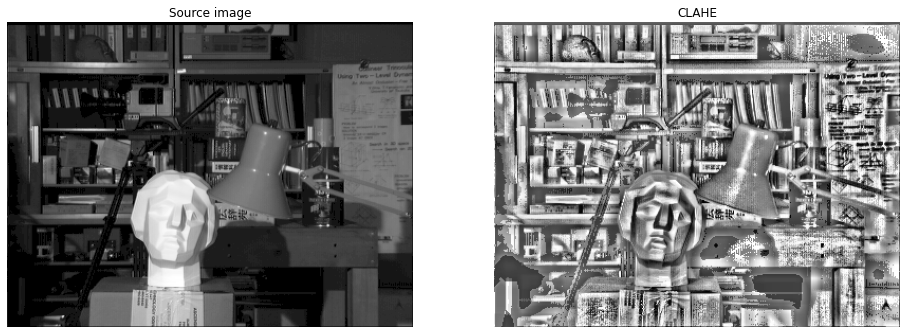

In [11]:
# Note that you are not supposed to get an excellent result with the default grid size
# The correctness of your implementation is important. it is optional to change the grid size.
# Change the clip_limit to get the best result
fig = plt.figure(figsize= (16, 8))
src = cv2.imread('img_improvment.png', cv2.IMREAD_GRAYSCALE)
fig.add_subplot(1,2,1)
plt.imshow(src, cmap='gray')
plt.title('Source image')
plt.axis('off')

clahe_img = CLAHE(src,(20,20), 100)      # You get better result with with higher grid size
fig.add_subplot(1,2,2)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.show()

## Q4
### part a

In [ ]:
def convolve(image, kernel):
    '''
    You can use libraries
    There is no need to add padding
    input(s):
    image (ndarray): input image'
    kernel (ndarray): input kernel
    output(s):
    output (ndarray): filtered image
    '''
    output = image.copy()
    #your code here
    # Start
    output = cv2.filter2D(src=image, ddepth=-1, kernel=kernel)
    # End
    return output

### part b

In [ ]:
def get_gaussian(size, std):
    '''
    Do not use libraries
    input(s):
    size (tuple): height and width of kernel
    std (float): std of gaussian kernel
    output(s):
    kernel (ndarray): gaussian kernel with specified size and std
    '''
    #your code here
    # Start
    l= size[0]
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(std))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)
    # End

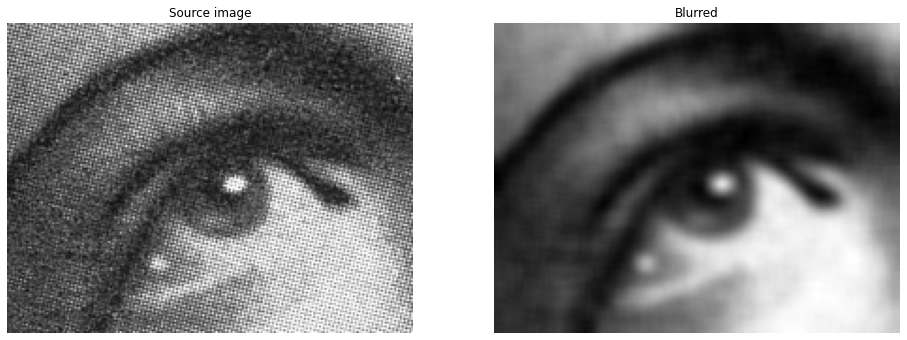

In [ ]:
fig = plt.figure(figsize= (16, 8))
src = cv2.imread('gaussian.png', cv2.IMREAD_GRAYSCALE)
fig.add_subplot(1,2,1)
plt.imshow(src, cmap='gray')
plt.title('Source image')
plt.axis('off')

kernel = get_gaussian((9,9), 10)
output = convolve(src, kernel)

fig.add_subplot(1,2,2)
plt.imshow(output, cmap='gray')
plt.title('Blurred')
plt.axis('off')

plt.show()